<a href="https://colab.research.google.com/github/KamilBienias/neural-network-course/blob/main/01_intro/01_pierwszy_model_sieci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Klasyfikator wieloklasowy - Digit Recognition

### Spis treści
1. [Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)](#a1)
    1. [Import bibliotek](#a2)
    2. [Załadowanie i przygotowanie danych](#a3)
    3. [Eksploracja danych](#a4)
    4. [Budowa sieci neuronowej](#a5)    
    5. [Trenowanie modelu](#a6)
    6. [Ocena modelu](#a7)
    7. [Predykcja na podstawie modelu](#a8)

### <a name='a1'></a>1. Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)

>Celem tego notebook'a jest wstępne zapoznanie się z interfejsem Google Colab oraz budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.

> Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów). 

#### <a name='a2'></a> 1.1 Import bibliotek

In [ ]:
# chyba nie trzeba było
# pip install tensorflow==2.0

In [ ]:
# to lepsze bo upgrade
# pip install --upgrade -q tensorflow

In [ ]:
# Użyj poniższego polecenia jeśli używasz innego środowiska niż Google Colab
# !pip install --upgrade -q tensorflow

# Istnieje tylko w Google Colab, wersja szybsza ;)
%tensorflow_version 2.x  

In [ ]:
# ######################################################
# Etap 4. Odcinek: Digit Recognition - rozpoznawanie ręcznie zapisanych cyfr.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential  # klasa pozwalająca budować modele warstwa po warstwie
from tensorflow.keras.layers import Flatten, Dense, Dropout  # warstwy

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# opcje drukowania tablic numpy
np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.4.1


### <a name='a3'></a> 1.2 Załadowanie i przygotowanie danych

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()
# rozmiar obrazu to 28 na 28 pikseli
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
# pierwsza próbka
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [ ]:
# potwierdza rozmiar
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [ ]:
# standaryzacja. Wartości będą z przedziału (0,1)
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
# sam ponownie wyświetlam pierwszą próbkę. Muszę zaokrąglić do 1 miejsca bo źle się wyświetla

for row in X_train[0]:
    i = 0
    for digit in row:
        i = i + 1
        print(round(digit, 1), end=" ")
        if i == 28:
            print()

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.1 0.5 0.5 0.7 0.1 0.7 1.0 1.0 0.5 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.4 0.6 0.7 1.0 1.0 1.0 1.0 1.0 0.9 0.7 1.0 0.9 0.8 0.3 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2 0.9 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.4 0.3 0.3 0.2 0.2 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.9 1.0 1.0 1.0 1.0 1.0 0.8 0.7 1.0 0.9 0.0 0.0 0.0 0.0 0.0 0.0 

### <a name='a4'></a> 1.3 Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

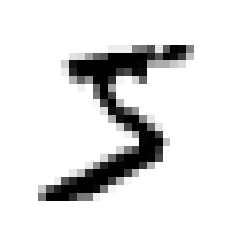

In [ ]:
# z matplotlib wyświetla jako obraz
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

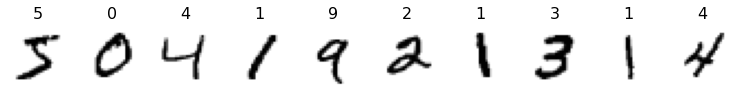

In [ ]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    # pierwsza liczba to ilość wierszy, druga to ilość kolumn, trzecia to indeks podwykresu
    plt.subplot(1, 10, i)
    # wyłącza osie
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

### <a name='a5'></a> 1.4 Budowa sieci neuronowej

In [ ]:
model = Sequential()
# dodaje 4 warstwy ukryte
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
# w ostatniej wartswie liczba neuronów musi odpowiadać liczbie klas.
# Funkcją aktywacji jest softmax
model.add(Dense(units=10, activation='softmax'))

# gdy było optimizers to był błąd:
# TypeError: Invalid keyword argument(s) in `compile`: {'optimizers'} 
# dlatego zmieniłem na optimizer
# adam to skrótowa nazwa od optymalizatora
model.compile(optimizer='adam',
              # loss to funkcja straty, którą będzie minimalizował ten optymalizator  
              loss='sparse_categorical_crossentropy',
              # metrics to metryka względem której spr jak model działa na zbiorze walidacyjnym   
              metrics=['accuracy'])

# wyświetla budowę modelu
model.summary()
# Param # to liczba paramerów w każdej warstwie.
# Łącznie przetrenuje 101770 parametrów

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### <a name='a6'></a> 1.5 Trenowanie modelu

In [ ]:
# epochs mówi o krotności przejścia zbioru przez naszą sieć
# Nie daliśmy zbioru walidacyjnego.
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4820 - accuracy: 0.8602
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1523 - accuracy: 0.9544
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1082 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0859 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0732 - accuracy: 0.9774


### <a name='a7'></a> 1.6 Ocena modelu

In [ ]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0724 - accuracy: 0.9777


[0.07238241285085678, 0.9776999950408936]

In [ ]:
# zmienna history, do której przypisaliśmy rezultat modelu ma atrybut history   
# który zawiera dane dotyczące naszego trenowania.
# Wiersz to epoki
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.294701,0.914767
1,0.143564,0.957217
2,0.108417,0.967183
3,0.086902,0.973217
4,0.074690,0.976733


In [ ]:
# Wykres jak wyglądał proces trenowania w zależności od ilości epok.
# Już wcześniej zaimportowana funkcja make_subplots
# from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=1)
# na osi x są indeksy z df o nazwie metrics
# name to nazwa w legendzie
# wiersz 1, kolumna 1
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
# wiersz 2, kolumna 1
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(title="Proces trenowania w zależności od ilości epok", width=800)

### <a name='a8'></a> 1.7 Predykcja na podstawie modelu

In [ ]:
# ta tablica numpy zawiera p-twa przynależności do danej klasy.
# Powinno być 10 kolumn, ale numpyarray wyświetla tylko 3 pierwsze i 3 ostatnie kolumny
macierz_prawdopodobienstw = model.predict(X_test)
print("Macierz prawdopodobieństw:")
print(macierz_prawdopodobienstw)

# sam wybieram największe p-two z każdej listy. To będzie predycja od której klasy należy obrazek
indeksy_najwiekszych_prawdopodobienstw = []
najwieksze_prawdopodobienstwa = []
for wiersz_prawdopodobienstw in macierz_prawdopodobienstw:
    najw_prawdopodobienstwo = max(wiersz_prawdopodobienstw)
    wiersz_prawdopodobienstw_lista = list(wiersz_prawdopodobienstw)
    indeks_najwiekszego_prawdopodobienstwa = wiersz_prawdopodobienstw_lista.index(najw_prawdopodobienstwo)
    indeksy_najwiekszych_prawdopodobienstw.append(indeks_najwiekszego_prawdopodobienstwa)
    najwieksze_prawdopodobienstwa.append(najw_prawdopodobienstwo)

# print(len(indeksy_najwiekszych_prawdopodobienstw))
# print(len(najwieksze_prawdopodobienstwa))
# zipped = zip(indeksy_najwiekszych_prawdopodobienstw, najwieksze_prawdopodobienstwa)
# print(list(zipped))
print()
wyniki_df = pd.DataFrame({"max probability": najwieksze_prawdopodobienstwa, 
                          "predicted digit": indeksy_najwiekszych_prawdopodobienstw})
print(wyniki_df)

Macierz prawdopodobieństw:
[[0.000000009215 0.000000000238 0.000006223143 ... 0.99987936     0.000000229504 0.000001487562]
 [0.000000002906 0.000006650575 0.9999863      ... 0.000000000002 0.000000097272 0.000000000002]
 [0.000000961841 0.9989236      0.00029559413  ... 0.0005047453   0.00024698707  0.000000539835]
 ...
 [0.000000000002 0.000000000874 0.000000000014 ... 0.000011738739 0.000001300379 0.000028828055]
 [0.000000046636 0.000000044636 0.00000000043  ... 0.000000077511 0.013223678    0.000000056829]
 [0.000000043815 0.             0.000000038272 ... 0.000000000005 0.000000001875 0.000000000158]]

      max probability  predicted digit
0            0.999879                7
1            0.999986                2
2            0.998924                1
3            0.999425                0
4            0.997623                4
...               ...              ...
9995         0.999979                2
9996         0.997767                3
9997         0.999958            

In [ ]:
# przewidywane klasy
y_pred = model.predict_classes(X_test)
y_pred

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
# axis=1 oznacza konkatenację po kolumnach tych dwóch df
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
# 10 pierwszych indeksów dla których nastąpiła pomyłka
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [ ]:
# źle sklasyfikowane
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([96, 247, 259, 290, 320, 321, 340, 381, 445, 582], dtype='int64')

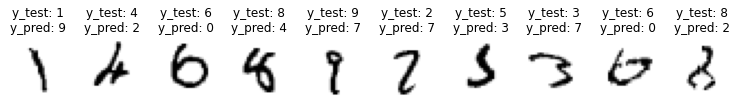

In [ ]:
plt.figure(figsize=(13, 13))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title('y_test: ' + str(y_test[j]) + '\n' + 'y_pred: ' + str(y_pred[j]), color='black', fontsize=12)
plt.show()